# Limpieza y creación del dataframe

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import os
import urg_func

In [35]:
np.random.seed(42)

In [36]:
connection = sqlite3.connect("data/BDTerra.db")

In [37]:
crsr = connection.cursor()

In [34]:
def sql_query(query):    # Ejecuta la query
    crsr.execute(query)    # Almacena los datos de la query
    ans = crsr.fetchall()    # Obtenemos los nombres de las columnas de la tabla
    names = [description[0] for description in crsr.description]    
    return pd.DataFrame(ans,columns=names)

In [ ]:
query1 = """
SELECT *
FROM ISSUES
"""

In [32]:
query2 = """
SELECT * 
FROM Projects
"""

In [10]:
df = sql_query(query1)

In [ ]:
df_project = sql_query(query2)

In [48]:
df_project

,Project ID,Name,Project Type,Client ID,Budget,Project Manager ID,Beggining date,Contact ID
0,PC101,RipplePC101,Strategy,C1,1572929.92,E4,2017-07-06,COC101
1,PC102,RipplePC102,Strategy,C1,1410643.5,E5,2020-09-28,COC101
2,PC103,RipplePC103,Website,C1,1373192.78,E5,2017-11-08,COC101
3,PC104,RipplePC104,Campaign,C1,1285807.79,E4,2020-03-13,COC101
4,PC105,RipplePC105,Website,C1,1473061.35,E5,2022-06-16,COC101
5,PC106,RipplePC106,Website,C1,1585413.49,E5,2021-04-13,COC101
6,PC107,RipplePC107,Website,C1,1160972.08,E5,2015-08-20,COC101
7,PC201,RipplePC201,Strategy,C2,1368375.74,E4,2016-03-25,COC201
8,PC202,RipplePC202,Website,C2,1275288.95,E4,2018-01-18,COC201
9,PC203,RipplePC203,Strategy,C2,605064.1,E4,2016-09-14,COC201


In [13]:
df.columns

Index(['Issue ID', 'Project ID', 'Classification', 'Screenshot', 'Urgency',
       'Input Date', 'Deadline Theor', 'Deadline Real', 'Employee ID',
       'Device ', 'Browser', 'Page', 'Contact ID', 'Request'],
      dtype='object')

In [15]:
df.sort_values(by = "Issue ID", inplace=True)

In [28]:
df["Classification"].unique()

array(['Design issues', 'Copy issues', 'New item', 'Request change',
       'Not addressing', 'Bug fix'], dtype=object)

In [32]:
iteraciones_medias = {
    "Copy issues": (4,1),
    "Request change": (8,2),
    "Design issues": (4,2),
    "New item": (10,4),
    "Bug fix": (8,3),
    "Not addressing": (1,0.2)
}

In [116]:
def genera_iteraciones(clase):
    for i in df["Classification"].unique():
        if clase == i:
            med = iteraciones_medias[i][0]
            var = iteraciones_medias[i][1]
            return np.random.normal(med,var)

In [117]:
for i in df["Classification"].unique():
    med = iteraciones_medias[i][0]
    var = iteraciones_medias[i][1]
    print(med,var)

4 2
4 1
10 4
8 2
1 0.2
8 3


In [118]:
it = []
for i in df["Classification"]:
    it.append(genera_iteraciones(i))

In [119]:
it = np.trunc(it)

In [122]:
df["Iteraciones"] = abs(it)

In [85]:
df["Iteraciones"].describe()

count    5700.000000
mean        4.405789
std         2.638160
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max        20.000000
Name: Iteraciones, dtype: float64

In [30]:
def inicio_proyecto(proj_id):
    return pd.to_datetime(df_project[df_project["Project ID"] == proj_id]["Beggining date"].values[0])


np.int64(5700)

In [28]:
def timelapse(issue_id):
    date = df[df["Issue ID"] == issue_id]["Input Date"].values[0]
    # print(date)
    proj_id = df[df["Issue ID"] == issue_id]["Project ID"].values[0]
    return max(pd.to_datetime(date) - pd.DateOffset(days=30), inicio_proyecto(proj_id))

In [46]:
df["Input Date"] = pd.to_datetime(df["Input Date"])

In [127]:
df.head()

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias
3855,IPC100101,PC1001,Design issues,0,,2015-09-05,,2015-09-06,E2,Mobile,Mozilla,True,COC1001,The spacing around section titles [645] should...,4.0,34
622,IPC1001010,PC1001,Copy issues,0,,2015-02-06,,2015-02-08,E1,Desktop,Safari,True,COC1001,Please rewrite for clarity the CTA button labe...,3.0,53
4500,IPC10010100,PC1001,New item,0,,2014-09-14,,2014-09-16,E3,Desktop,Chrome,True,COC1001,"Please add a FAQs segmented by user type, to m...",12.0,7
4555,IPC1001011,PC1001,New item,0,,2015-06-14,,2015-06-17,E3,Desktop,Chrome,True,COC1001,Please add a customizable data visualization b...,16.0,37
620,IPC1001012,PC1001,Copy issues,1,,2015-05-29,,2015-06-01,E1,Desktop,Safari,True,COC1001,Please emphasize benefits over features the Ca...,3.0,59


In [128]:
def suma_it(issue_id):
    fecha_30 = timelapse(issue_id)
    # print(fecha_30)
    input = df[df["Issue ID"] == issue_id]["Input Date"].values[0]
    # print(input)
    proj_id = df[df["Issue ID"] == issue_id]["Project ID"].values[0]
    aux = df[(df["Project ID"] == proj_id) & (df["Input Date"].between(fecha_30,input))]
    # print(aux)
    return int(aux["Iteraciones"].sum())


In [ ]:
# def movida(issue_id):
#     fecha_30 = timelapse(issue_id)
#     # print(fecha_30)
#     input = df[df["Issue ID"] == issue_id]["Input Date"].values[0]
#     # print(input)
#     proj_id = df[df["Issue ID"] == issue_id]["Project ID"].values[0]
#     aux = df[(df["Project ID"] == proj_id) & (df["Input Date"].between(fecha_30,input))]
#     # print(aux)
#     return aux


In [130]:
sumas = []
for i in df["Issue ID"]:
    sumas.append(suma_it(i))
sumas

[32,
 50,
 15,
 54,
 48,
 52,
 24,
 35,
 41,
 25,
 35,
 42,
 54,
 37,
 66,
 16,
 49,
 53,
 9,
 49,
 31,
 50,
 62,
 73,
 12,
 33,
 33,
 37,
 37,
 51,
 47,
 42,
 40,
 29,
 36,
 42,
 54,
 54,
 26,
 70,
 32,
 25,
 39,
 57,
 63,
 40,
 15,
 38,
 16,
 49,
 40,
 78,
 12,
 27,
 62,
 34,
 9,
 31,
 36,
 47,
 31,
 49,
 53,
 13,
 40,
 34,
 12,
 44,
 46,
 32,
 72,
 48,
 41,
 42,
 32,
 47,
 41,
 38,
 51,
 33,
 45,
 66,
 36,
 53,
 63,
 44,
 41,
 16,
 18,
 43,
 25,
 53,
 37,
 33,
 34,
 44,
 34,
 51,
 41,
 57,
 27,
 29,
 39,
 39,
 38,
 32,
 40,
 79,
 28,
 48,
 29,
 31,
 43,
 42,
 40,
 44,
 29,
 44,
 41,
 66,
 50,
 32,
 28,
 61,
 25,
 34,
 5,
 31,
 36,
 76,
 50,
 37,
 49,
 44,
 36,
 40,
 35,
 36,
 55,
 32,
 53,
 60,
 37,
 46,
 58,
 58,
 49,
 49,
 27,
 25,
 58,
 39,
 51,
 54,
 48,
 60,
 51,
 35,
 37,
 79,
 37,
 36,
 31,
 52,
 30,
 46,
 36,
 40,
 33,
 35,
 19,
 38,
 34,
 28,
 38,
 45,
 72,
 32,
 53,
 52,
 34,
 35,
 22,
 50,
 36,
 42,
 38,
 3,
 53,
 45,
 55,
 34,
 24,
 34,
 64,
 50,
 48,
 35,
 72,
 10,
 45,

In [ ]:
df["Iteraciones 30 dias"] = sumas

In [132]:
df["Iteraciones 30 dias"].sort_values().unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  91,  92,
        93,  94,  99, 104])

In [133]:
df[df["Iteraciones 30 dias"] == df["Iteraciones 30 dias"].max()]

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias
3074,IPC905048,PC905,Design issues,0,,2018-04-04,,2018-04-07,E2,Desktop,Chrome,True,COC901,The contrast levels in the hero section [336] ...,5.0,104


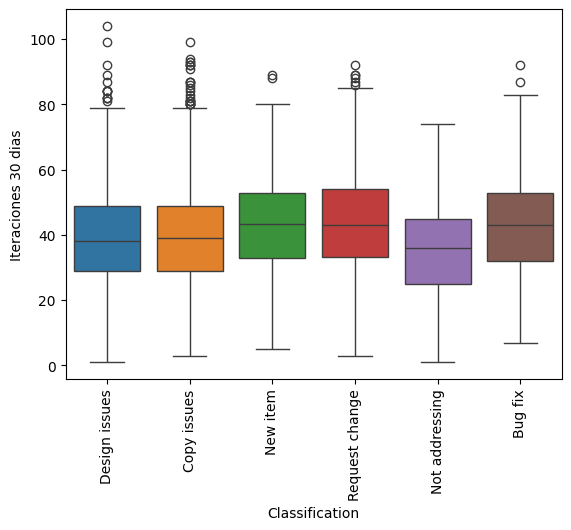

In [75]:
sns.boxplot(df, x = df["Classification"],y = df["Iteraciones 30 dias"], hue = "Classification", orient="v", legend=False)
plt.xticks(rotation = "vertical");


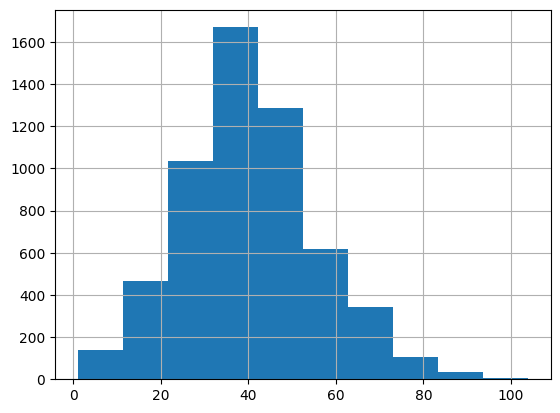

In [87]:
df["Iteraciones 30 dias"].hist(bins = 10);

In [ ]:
# movida("IPC601044").sort_values(by = "Input Date")

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias
3605,IPC601019,PC601,Design issues,0,,2015-01-25,,2015-01-27,E2,Desktop,Safari,True,COC601,The tooltip styling [770] has poor contrast ra...,1.0,48
4490,IPC601026,PC601,New item,1,,2015-01-25,,2015-01-26,E3,Desktop,Chrome,True,COC601,Please add a animated explainer about product ...,15.0,48
3610,IPC601079,PC601,Design issues,0,,2015-01-25,,2015-01-27,E2,Tablet,Chrome,True,COC601,The logo size [79] doesn’t respect the establi...,0.0,48
4488,IPC601041,PC601,New item,0,,2015-01-28,,2015-01-30,E3,Desktop,Chrome,True,COC601,"Please add a AI-powered search functionality, ...",10.0,61
3482,IPC601050,PC601,Design issues,0,,2015-01-28,,2015-01-30,E2,Desktop,Chrome,True,COC601,The structure of content in modals [850] doesn...,3.0,61
1999,IPC60105,PC601,Copy issues,0,,2015-01-31,,2015-02-03,E1,Mobile,Edge,True,COC601,Please revise the Services overview paragraph ...,3.0,56
1910,IPC601045,PC601,Copy issues,0,,2015-02-03,,2015-02-04,E1,Desktop,Safari,True,COC601,Please simplify the Careers page intro — let's...,5.0,54
1986,IPC601091,PC601,Copy issues,0,,2015-02-06,,2015-02-09,E1,Tablet,Safari,True,COC601,Please update to reflect our new tone the foot...,3.0,57
66,IPC601025,PC601,Bug fix,0,,2015-02-08,,2015-02-09,E3,Desktop,Mozilla,True,COC601,The Google Maps embed displays wrong font fall...,9.0,63
4725,IPC601042,PC601,Not addressing,0,,2015-02-09,,2015-02-12,E4,Desktop,Chrome,True,COC601,Can we have different page themes depending on...,1.0,64


In [135]:
df

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias
3855,IPC100101,PC1001,Design issues,0,,2015-09-05,,2015-09-06,E2,Mobile,Mozilla,True,COC1001,The spacing around section titles [645] should...,4.0,32
622,IPC1001010,PC1001,Copy issues,0,,2015-02-06,,2015-02-08,E1,Desktop,Safari,True,COC1001,Please rewrite for clarity the CTA button labe...,3.0,50
4500,IPC10010100,PC1001,New item,0,,2014-09-14,,2014-09-16,E3,Desktop,Chrome,True,COC1001,"Please add a FAQs segmented by user type, to m...",12.0,15
4555,IPC1001011,PC1001,New item,0,,2015-06-14,,2015-06-17,E3,Desktop,Chrome,True,COC1001,Please add a customizable data visualization b...,16.0,54
620,IPC1001012,PC1001,Copy issues,1,,2015-05-29,,2015-06-01,E1,Desktop,Safari,True,COC1001,Please emphasize benefits over features the Ca...,3.0,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,IPC909095,PC909,Bug fix,0,,2014-01-05,,2014-01-08,E3,Mobile,Safari,True,COC901,The search field behavior displays wrong font ...,9.0,30
4138,IPC909096,PC909,Design issues,0,,2014-01-01,,2014-01-02,E2,Mobile,Chrome,True,COC901,The contrast levels in the hero section [344] ...,3.0,20
834,IPC909097,PC909,Copy issues,0,,2013-04-22,,2013-04-25,E1,Mobile,Safari,True,COC901,Please remove buzzwords from the ‘Contact Us’ ...,3.0,78
4112,IPC909098,PC909,Design issues,0,,2013-04-15,,2013-04-16,E2,Desktop,Chrome,True,COC901,The color palette [3] feels too heavy visually.,3.0,76


In [ ]:
df = pd.read_csv("ISSUES_Iteraciones.csv")

In [44]:
df.columns

Index(['Issue ID', 'Project ID', 'Classification', 'Screenshot', 'Urgency',
       'Input Date', 'Deadline Theor', 'Deadline Real', 'Employee ID',
       'Device ', 'Browser', 'Page', 'Contact ID', 'Request', 'Iteraciones',
       'Iteraciones 30 dias'],
      dtype='object')

In [52]:
def suma_na(issue_id):
    # print(fecha_30)
    input = pd.to_datetime(df[df["Issue ID"] == issue_id]["Input Date"].values[0])
    # print(input)
    proj_id = df[df["Issue ID"] == issue_id]["Project ID"].values[0]
    fecha = inicio_proyecto(proj_id)
    # print(fecha)
    aux = df[(df["Project ID"] == proj_id) & (df["Input Date"].between(fecha,input)) & (df["Classification"] == "Not addressing")]
    # print(aux)
    return int(aux["Issue ID"].count())

In [42]:
# df[df["Input Date"].between(pd.to_datetime("2014-09-14"),pd.to_datetime("2015-09-05"))]

In [48]:
suma_na("IPC100101")

5

In [53]:
suma_not = []
for i in df["Issue ID"]:
    suma_not.append(suma_na(i))
suma_not

[5,
 2,
 0,
 5,
 3,
 2,
 2,
 0,
 2,
 2,
 2,
 1,
 1,
 1,
 5,
 2,
 5,
 3,
 2,
 3,
 2,
 1,
 5,
 5,
 2,
 5,
 5,
 5,
 3,
 5,
 2,
 2,
 3,
 2,
 1,
 5,
 1,
 2,
 2,
 5,
 5,
 2,
 1,
 1,
 5,
 5,
 0,
 5,
 2,
 2,
 5,
 5,
 2,
 0,
 1,
 2,
 2,
 2,
 5,
 5,
 3,
 1,
 3,
 2,
 0,
 5,
 2,
 5,
 1,
 2,
 5,
 0,
 2,
 2,
 2,
 1,
 3,
 5,
 2,
 0,
 5,
 5,
 4,
 3,
 5,
 5,
 2,
 2,
 0,
 0,
 2,
 1,
 2,
 5,
 0,
 2,
 2,
 5,
 1,
 5,
 0,
 5,
 3,
 4,
 4,
 4,
 4,
 0,
 5,
 4,
 5,
 5,
 4,
 4,
 4,
 5,
 5,
 3,
 2,
 4,
 0,
 5,
 5,
 4,
 0,
 3,
 0,
 3,
 3,
 0,
 0,
 4,
 2,
 5,
 5,
 4,
 2,
 5,
 0,
 4,
 5,
 0,
 4,
 4,
 4,
 4,
 5,
 4,
 5,
 0,
 4,
 4,
 2,
 4,
 5,
 4,
 2,
 1,
 0,
 0,
 3,
 3,
 2,
 4,
 5,
 4,
 5,
 5,
 5,
 5,
 4,
 3,
 4,
 3,
 3,
 3,
 0,
 0,
 4,
 4,
 4,
 4,
 5,
 4,
 1,
 0,
 4,
 0,
 4,
 4,
 0,
 3,
 5,
 5,
 4,
 4,
 4,
 2,
 0,
 0,
 3,
 1,
 1,
 3,
 4,
 6,
 3,
 1,
 3,
 2,
 0,
 0,
 1,
 1,
 1,
 2,
 2,
 3,
 0,
 3,
 1,
 4,
 3,
 0,
 3,
 3,
 2,
 1,
 2,
 3,
 2,
 4,
 6,
 0,
 4,
 4,
 4,
 1,
 3,
 2,
 2,
 2,
 1,
 1,
 4,
 2,
 2,
 1,
 1,
 2,


In [54]:
df["Not addressing historico"] = suma_not

In [55]:
df["Not addressing historico"].value_counts()

Not addressing historico
0    1576
1    1427
2    1301
3     655
4     460
5     201
7      30
8      27
6      23
Name: count, dtype: int64

In [5]:
df.to_csv("ISSUES_Iteraciones.csv", index = False)

In [19]:
df_label = pd.read_csv("issues_labeled_ord.csv")
df_label

,Issue ID,Request,labels
0,IPC100101,The spacing around section titles [645] should...,1
1,IPC1001010,Please rewrite for clarity the CTA button labe...,1
2,IPC10010100,"Please add a FAQs segmented by user type, to m...",1
3,IPC1001011,Please add a customizable data visualization b...,2
4,IPC1001012,Please emphasize benefits over features the Ca...,2
...,...,...,...
5695,IPC909095,The search field behavior displays wrong font ...,0
5696,IPC909096,The contrast levels in the hero section [344] ...,0
5697,IPC909097,Please remove buzzwords from the ‘Contact Us’ ...,1
5698,IPC909098,The color palette [3] feels too heavy visually.,0


In [20]:
df_label["labels"] = np.where(df_label["labels"] == 1, "Neutral", df_label["labels"])
df_label

,Issue ID,Request,labels
0,IPC100101,The spacing around section titles [645] should...,Neutral
1,IPC1001010,Please rewrite for clarity the CTA button labe...,Neutral
2,IPC10010100,"Please add a FAQs segmented by user type, to m...",Neutral
3,IPC1001011,Please add a customizable data visualization b...,2
4,IPC1001012,Please emphasize benefits over features the Ca...,2
...,...,...,...
5695,IPC909095,The search field behavior displays wrong font ...,0
5696,IPC909096,The contrast levels in the hero section [344] ...,0
5697,IPC909097,Please remove buzzwords from the ‘Contact Us’ ...,Neutral
5698,IPC909098,The color palette [3] feels too heavy visually.,0


In [22]:
df_label["labels"] = np.where(df_label["labels"] == "0", "Negative", df_label["labels"])
df_label

,Issue ID,Request,labels
0,IPC100101,The spacing around section titles [645] should...,Neutral
1,IPC1001010,Please rewrite for clarity the CTA button labe...,Neutral
2,IPC10010100,"Please add a FAQs segmented by user type, to m...",Neutral
3,IPC1001011,Please add a customizable data visualization b...,2
4,IPC1001012,Please emphasize benefits over features the Ca...,2
...,...,...,...
5695,IPC909095,The search field behavior displays wrong font ...,Negative
5696,IPC909096,The contrast levels in the hero section [344] ...,Negative
5697,IPC909097,Please remove buzzwords from the ‘Contact Us’ ...,Neutral
5698,IPC909098,The color palette [3] feels too heavy visually.,Negative


In [23]:
df_label["labels"] = np.where(df_label["labels"] == "2", "Positive", df_label["labels"])
df_label

,Issue ID,Request,labels
0,IPC100101,The spacing around section titles [645] should...,Neutral
1,IPC1001010,Please rewrite for clarity the CTA button labe...,Neutral
2,IPC10010100,"Please add a FAQs segmented by user type, to m...",Neutral
3,IPC1001011,Please add a customizable data visualization b...,Positive
4,IPC1001012,Please emphasize benefits over features the Ca...,Positive
...,...,...,...
5695,IPC909095,The search field behavior displays wrong font ...,Negative
5696,IPC909096,The contrast levels in the hero section [344] ...,Negative
5697,IPC909097,Please remove buzzwords from the ‘Contact Us’ ...,Neutral
5698,IPC909098,The color palette [3] feels too heavy visually.,Negative


In [24]:
df["Sentiment"] = df_label["labels"]
df["Sentiment"].value_counts()

Sentiment
Neutral     2900
Negative    2217
Positive     583
Name: count, dtype: int64

In [60]:
def suma_neg(issue_id):
    fecha_30 = timelapse(issue_id)
    fecha_30 = pd.to_datetime(fecha_30)
    # print(fecha_30)
    input = df[df["Issue ID"] == issue_id]["Input Date"].values[0]
    input = pd.to_datetime(input)
    # print(input)
    proj_id = df[df["Issue ID"] == issue_id]["Project ID"].values[0]
    aux = df[(df["Project ID"] == proj_id) & (df["Input Date"].between(fecha_30,input)) & (df["Sentiment"] == "Negative")]
    # print(aux)
    # print(aux)
    return int(aux["Issue ID"].count())

In [62]:
hist_neg = []
for i in df["Issue ID"]:
    hist_neg.append(suma_neg(i))
hist_neg

[1,
 7,
 0,
 3,
 1,
 6,
 5,
 4,
 7,
 2,
 5,
 5,
 5,
 4,
 4,
 2,
 3,
 4,
 3,
 2,
 4,
 4,
 3,
 2,
 4,
 3,
 2,
 2,
 4,
 3,
 7,
 4,
 2,
 5,
 3,
 3,
 5,
 7,
 3,
 4,
 2,
 2,
 4,
 6,
 4,
 3,
 0,
 3,
 6,
 6,
 3,
 3,
 5,
 1,
 5,
 5,
 3,
 4,
 2,
 2,
 4,
 4,
 4,
 5,
 4,
 2,
 4,
 4,
 5,
 6,
 3,
 2,
 4,
 6,
 5,
 3,
 4,
 2,
 7,
 3,
 3,
 4,
 2,
 4,
 4,
 2,
 7,
 3,
 0,
 2,
 2,
 4,
 4,
 3,
 2,
 6,
 2,
 3,
 4,
 4,
 1,
 2,
 4,
 2,
 4,
 3,
 3,
 6,
 1,
 2,
 2,
 2,
 3,
 2,
 5,
 4,
 3,
 4,
 4,
 5,
 2,
 3,
 2,
 5,
 1,
 3,
 1,
 4,
 1,
 6,
 2,
 4,
 6,
 2,
 4,
 3,
 4,
 4,
 3,
 3,
 3,
 5,
 4,
 3,
 5,
 5,
 2,
 2,
 4,
 1,
 4,
 5,
 6,
 4,
 2,
 4,
 6,
 4,
 1,
 6,
 4,
 4,
 3,
 4,
 3,
 3,
 4,
 2,
 3,
 4,
 3,
 2,
 5,
 2,
 4,
 4,
 7,
 1,
 4,
 4,
 2,
 3,
 1,
 3,
 5,
 2,
 3,
 0,
 5,
 4,
 4,
 3,
 1,
 5,
 4,
 3,
 2,
 4,
 7,
 1,
 4,
 5,
 2,
 3,
 3,
 4,
 1,
 3,
 1,
 3,
 1,
 1,
 5,
 4,
 3,
 6,
 1,
 2,
 1,
 1,
 2,
 2,
 4,
 0,
 2,
 1,
 3,
 3,
 1,
 1,
 5,
 3,
 3,
 0,
 3,
 3,
 3,
 4,
 1,
 2,
 1,
 5,
 3,
 2,
 3,
 5,
 1,
 5,
 4,
 3,


In [63]:
df["Sentiment historico"] = hist_neg

In [64]:
df

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias,Not addressing historico,Sentiment,Sentiment historico
0,IPC100101,PC1001,Design issues,0,NaN,2015-09-05,NaN,2015-09-06,E2,Mobile,Mozilla,True,COC1001,The spacing around section titles [645] should...,4.0,32,5,Neutral,1
1,IPC1001010,PC1001,Copy issues,0,NaN,2015-02-06,NaN,2015-02-08,E1,Desktop,Safari,True,COC1001,Please rewrite for clarity the CTA button labe...,3.0,50,2,Neutral,7
2,IPC10010100,PC1001,New item,0,NaN,2014-09-14,NaN,2014-09-16,E3,Desktop,Chrome,True,COC1001,"Please add a FAQs segmented by user type, to m...",12.0,15,0,Neutral,0
3,IPC1001011,PC1001,New item,0,NaN,2015-06-14,NaN,2015-06-17,E3,Desktop,Chrome,True,COC1001,Please add a customizable data visualization b...,16.0,54,5,Positive,3
4,IPC1001012,PC1001,Copy issues,1,NaN,2015-05-29,NaN,2015-06-01,E1,Desktop,Safari,True,COC1001,Please emphasize benefits over features the Ca...,3.0,48,3,Positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,IPC909095,PC909,Bug fix,0,NaN,2014-01-05,NaN,2014-01-08,E3,Mobile,Safari,True,COC901,The search field behavior displays wrong font ...,9.0,30,2,Negative,4
5696,IPC909096,PC909,Design issues,0,NaN,2014-01-01,NaN,2014-01-02,E2,Mobile,Chrome,True,COC901,The contrast levels in the hero section [344] ...,3.0,20,2,Negative,3
5697,IPC909097,PC909,Copy issues,0,NaN,2013-04-22,NaN,2013-04-25,E1,Mobile,Safari,True,COC901,Please remove buzzwords from the ‘Contact Us’ ...,3.0,78,0,Neutral,6
5698,IPC909098,PC909,Design issues,0,NaN,2013-04-15,NaN,2013-04-16,E2,Desktop,Chrome,True,COC901,The color palette [3] feels too heavy visually.,3.0,76,0,Negative,7


In [66]:
df2 = df.merge(df_project[["Project ID", "Budget"]], how = "left", on = "Project ID")
df2

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias,Not addressing historico,Sentiment,Sentiment historico,Budget
0,IPC100101,PC1001,Design issues,0,NaN,2015-09-05,NaN,2015-09-06,E2,Mobile,Mozilla,True,COC1001,The spacing around section titles [645] should...,4.0,32,5,Neutral,1,6983.63
1,IPC1001010,PC1001,Copy issues,0,NaN,2015-02-06,NaN,2015-02-08,E1,Desktop,Safari,True,COC1001,Please rewrite for clarity the CTA button labe...,3.0,50,2,Neutral,7,6983.63
2,IPC10010100,PC1001,New item,0,NaN,2014-09-14,NaN,2014-09-16,E3,Desktop,Chrome,True,COC1001,"Please add a FAQs segmented by user type, to m...",12.0,15,0,Neutral,0,6983.63
3,IPC1001011,PC1001,New item,0,NaN,2015-06-14,NaN,2015-06-17,E3,Desktop,Chrome,True,COC1001,Please add a customizable data visualization b...,16.0,54,5,Positive,3,6983.63
4,IPC1001012,PC1001,Copy issues,1,NaN,2015-05-29,NaN,2015-06-01,E1,Desktop,Safari,True,COC1001,Please emphasize benefits over features the Ca...,3.0,48,3,Positive,1,6983.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,IPC909095,PC909,Bug fix,0,NaN,2014-01-05,NaN,2014-01-08,E3,Mobile,Safari,True,COC901,The search field behavior displays wrong font ...,9.0,30,2,Negative,4,8698.61
5696,IPC909096,PC909,Design issues,0,NaN,2014-01-01,NaN,2014-01-02,E2,Mobile,Chrome,True,COC901,The contrast levels in the hero section [344] ...,3.0,20,2,Negative,3,8698.61
5697,IPC909097,PC909,Copy issues,0,NaN,2013-04-22,NaN,2013-04-25,E1,Mobile,Safari,True,COC901,Please remove buzzwords from the ‘Contact Us’ ...,3.0,78,0,Neutral,6,8698.61
5698,IPC909098,PC909,Design issues,0,NaN,2013-04-15,NaN,2013-04-16,E2,Desktop,Chrome,True,COC901,The color palette [3] feels too heavy visually.,3.0,76,0,Negative,7,8698.61


In [70]:
df2["Budget"] = df2["Budget"].astype(float)

In [72]:
df2["Input Date"] = pd.to_datetime(df2["Input Date"])

In [74]:
df2.to_csv("csv_prueba.csv", index = False)

In [75]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Issue ID                  5700 non-null   object        
 1   Project ID                5700 non-null   object        
 2   Classification            5700 non-null   object        
 3   Screenshot                5700 non-null   int64         
 4   Urgency                   0 non-null      float64       
 5   Input Date                5700 non-null   datetime64[ns]
 6   Deadline Theor            0 non-null      float64       
 7   Deadline Real             5700 non-null   object        
 8   Employee ID               5700 non-null   object        
 9   Device                    5700 non-null   object        
 10  Browser                   5700 non-null   object        
 11  Page                      5700 non-null   bool          
 12  Contact ID          

In [73]:
urg_func.urgencia(df2)

TypeError: <class 'pandas._libs.tslibs.timedeltas.Timedelta'> is not convertible to datetime, at position 0

In [ ]:
# df = pd.read_csv("ISSUES_Iteraciones.csv")

In [ ]:
# df

,Issue ID,Project ID,Classification,Screenshot,Urgency,Input Date,Deadline Theor,Deadline Real,Employee ID,Device,Browser,Page,Contact ID,Request,Iteraciones,Iteraciones 30 dias,Not addressing historico
0,IPC100101,PC1001,Design issues,0,NaN,2015-09-05,NaN,2015-09-06,E2,Mobile,Mozilla,True,COC1001,The spacing around section titles [645] should...,4.0,32,5
1,IPC1001010,PC1001,Copy issues,0,NaN,2015-02-06,NaN,2015-02-08,E1,Desktop,Safari,True,COC1001,Please rewrite for clarity the CTA button labe...,3.0,50,2
2,IPC10010100,PC1001,New item,0,NaN,2014-09-14,NaN,2014-09-16,E3,Desktop,Chrome,True,COC1001,"Please add a FAQs segmented by user type, to m...",12.0,15,0
3,IPC1001011,PC1001,New item,0,NaN,2015-06-14,NaN,2015-06-17,E3,Desktop,Chrome,True,COC1001,Please add a customizable data visualization b...,16.0,54,5
4,IPC1001012,PC1001,Copy issues,1,NaN,2015-05-29,NaN,2015-06-01,E1,Desktop,Safari,True,COC1001,Please emphasize benefits over features the Ca...,3.0,48,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5695,IPC909095,PC909,Bug fix,0,NaN,2014-01-05,NaN,2014-01-08,E3,Mobile,Safari,True,COC901,The search field behavior displays wrong font ...,9.0,30,2
5696,IPC909096,PC909,Design issues,0,NaN,2014-01-01,NaN,2014-01-02,E2,Mobile,Chrome,True,COC901,The contrast levels in the hero section [344] ...,3.0,20,2
5697,IPC909097,PC909,Copy issues,0,NaN,2013-04-22,NaN,2013-04-25,E1,Mobile,Safari,True,COC901,Please remove buzzwords from the ‘Contact Us’ ...,3.0,78,0
5698,IPC909098,PC909,Design issues,0,NaN,2013-04-15,NaN,2013-04-16,E2,Desktop,Chrome,True,COC901,The color palette [3] feels too heavy visually.,3.0,76,0


In [ ]:
# df["Sentiment"] = None